In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

In [2]:
# setting the resolution of the figure
plt.rcParams['figure.dpi'] = 120

In [3]:
# import the data
data = pd.read_csv('../data/PSCompPars_2023.03.06_12.57.46.csv', comment='#', low_memory=False)
data

,loc_rowid,pl_name,hostname,gaia_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,1,11 Com b,11 Com,Gaia DR2 3946945413106333696,2,1,Radial Velocity,2007,Xinglong Station,0,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,2,11 UMi b,11 UMi,Gaia DR2 1696798367260229376,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,3,14 And b,14 And,Gaia DR2 1920113512486282240,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,4,14 Her b,14 Her,Gaia DR2 1385293808145621504,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,5,16 Cyg B b,16 Cyg B,Gaia DR2 2135550755683407232,3,1,Radial Velocity,1996,Multiple Observatories,0,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5267,5268,ups And b,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1996,Lick Observatory,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5268,5269,ups And c,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1999,Multiple Observatories,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5269,5270,ups And d,ups And,Gaia DR2 348020448377061376,2,3,Radial Velocity,1999,Multiple Observatories,0,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5270,5271,ups Leo b,ups Leo,Gaia DR2 3794167001116433152,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [4]:
byHost = data.groupby(by='hostname')

In [5]:
coexist_count = byHost.count().sort_values(by='pl_name')
coexist_count

,loc_rowid,pl_name,gaia_id,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
hostname,,,,,,,,,,,,,,,,,,,,,
11 Com,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Kepler-1869,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Kepler-1870,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Kepler-1871,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Kepler-1872,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD 219134,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Kepler-20,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
TOI-178,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


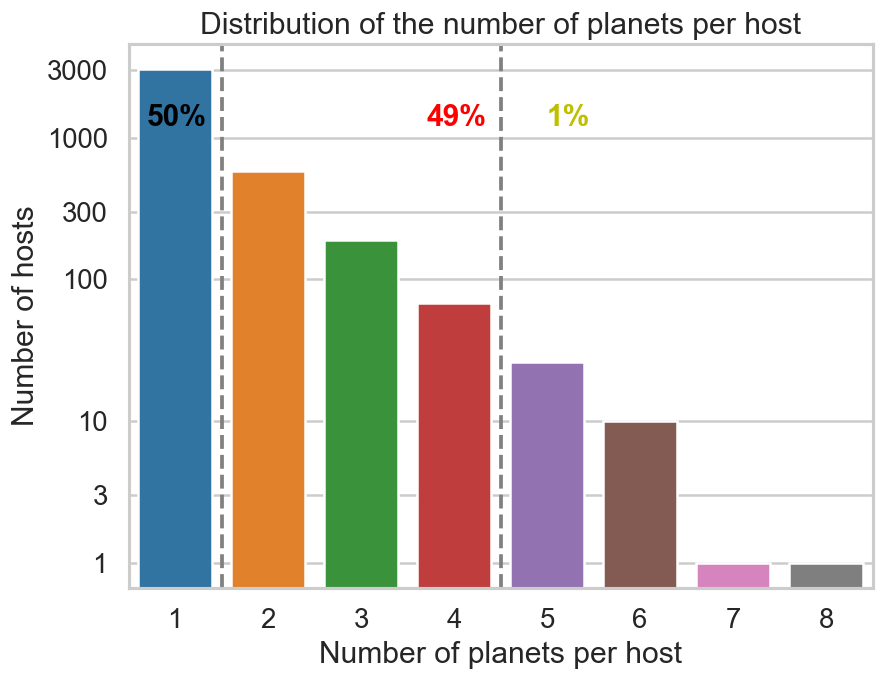

In [6]:
# make a seaborn plot of the distribution of the number of planets per host
import matplotlib.ticker as ticker

sns.set_style('whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 6))
# log scale
# sns.histplot(data=coexist_count, x='pl_name', bins=range(1, 8), kde=True, ax=ax, log_scale=(False, True))
sns.countplot(data=coexist_count, x='pl_name', ax=ax, log=True)

locs, labels = plt.yticks()
manual_minor_ticks = [3, 300, 3000]
plt.yticks(list(locs[2:-2]) + manual_minor_ticks, ['{:.0f}'.format(x) for x in list(locs[2:-2]) + manual_minor_ticks])

plt.axvline(x=0.5, linestyle='--', color='gray')
plt.text(-0.3, 0.85, '50%', color='k', transform=plt.gca().get_xaxis_transform(), fontweight='bold')

plt.axvline(x=3.5, linestyle='--', color='gray')
plt.text(2.7, 0.85, '49%', color='r', transform=plt.gca().get_xaxis_transform(), fontweight='bold')

plt.text(4, 0.85, '1%', color='y', transform=plt.gca().get_xaxis_transform(), fontweight='bold')

ax.set_xlabel('Number of planets per host')
ax.set_ylabel('Number of hosts')
ax.set_title('Distribution of the number of planets per host')
# ax.set_ylim(top=5000)
plt.show()

In [7]:
# separate planets based on temperature with bins of 500, 900, 1200, and 3000K
bins = [0, 500, 900, 1200, 3000]
labels = ['<500K', '500-900K', '900-1200K', '>1200K']
data['pl_eqt_bin'] = pd.cut(data['pl_eqt'], bins=bins, labels=labels)

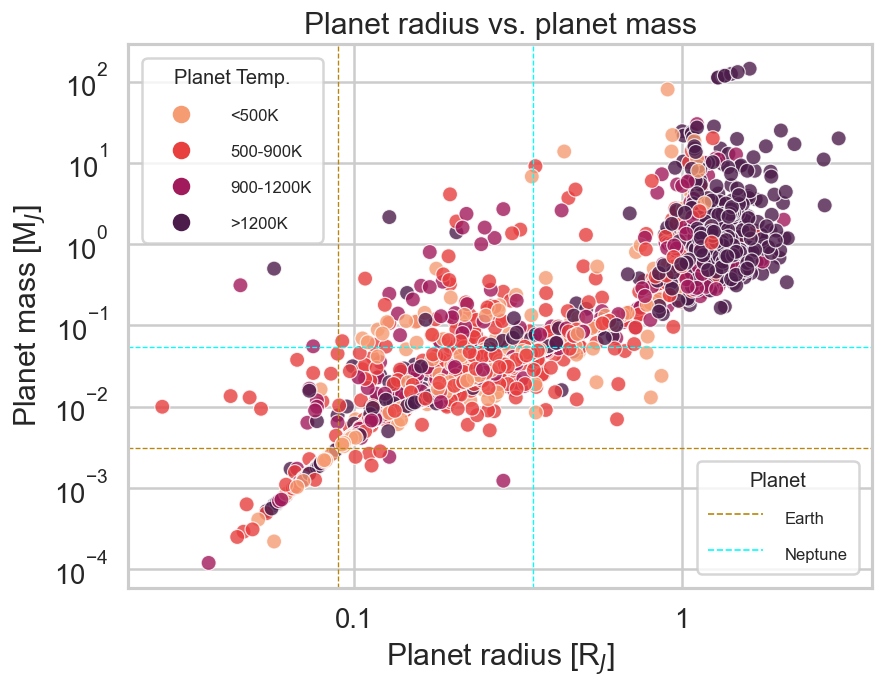

In [8]:
# make a seaborn scatter plot of the planet radius vs. planet mass in log scale
sns.set_style('whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=data, x='pl_radj', y='pl_bmassj', ax=ax, alpha=0.8, hue='pl_eqt_bin', palette='rocket_r', legend=True)
ax.set(xscale="log", yscale="log")
ax.set_xlabel('Planet radius [R$_J$]')
ax.set_ylabel('Planet mass [M$_J$]')
ax.set_title('Planet radius vs. planet mass')

# change legend title to 'Planet Temp.'
handles, labels = ax.get_legend_handles_labels()
legend1 = ax.legend(handles=handles[:], labels=labels[:], title='Planet Temp.')

# draw a vertical line at the radius of the Earth
plt.axvline(x=0.089, linestyle='--', color='darkgoldenrod', linewidth=0.8)

# draw a vertical line at the radius of Neptune
plt.axvline(x=0.352, linestyle='--', color='cyan', linewidth=0.8)

# draw a horizontal line at the mass of the Earth
plt.axhline(y=0.00314, linestyle='--', color='darkgoldenrod', linewidth=0.8)

#draw a horizontal line at the mass of Neptune
plt.axhline(y=0.054, linestyle='--', color='cyan', linewidth=0.8)

# make a second legend for the Earth and Neptune masses and radii lines
handles = [plt.Line2D([0], [0], color='darkgoldenrod', lw=1, linestyle='--'),
           plt.Line2D([0], [0], color='cyan', lw=1, linestyle='--')]
labels = ['Earth', 'Neptune']
legend2 = ax.legend(handles=handles, labels=labels, loc='lower right', title='Planet')
ax.add_artist(legend1)

for legend in (legend1, legend2):
    plt.setp(legend.get_texts(), fontsize='10') # for legend text
    plt.setp(legend.get_title(), fontsize='12') # for legend title

plt.xticks([0.1, 1], ['0.1', '1'])

plt.show()


In [9]:
# divide sample in two by exoplanet mass labelling as High-Mass Planets (HMPs – 655 exoplanets) the ones with minimum masses greater than 30 M⊕ (∼0.095 MJ), and Low-
# Mass Planets (LMPs – 127 exoplanets) the ones with minimum masses less than or equal to 30 M⊕
data['pl_mass_bin'] = np.where(data['pl_bmasse'] > 30, 'HMP', 'LMP')

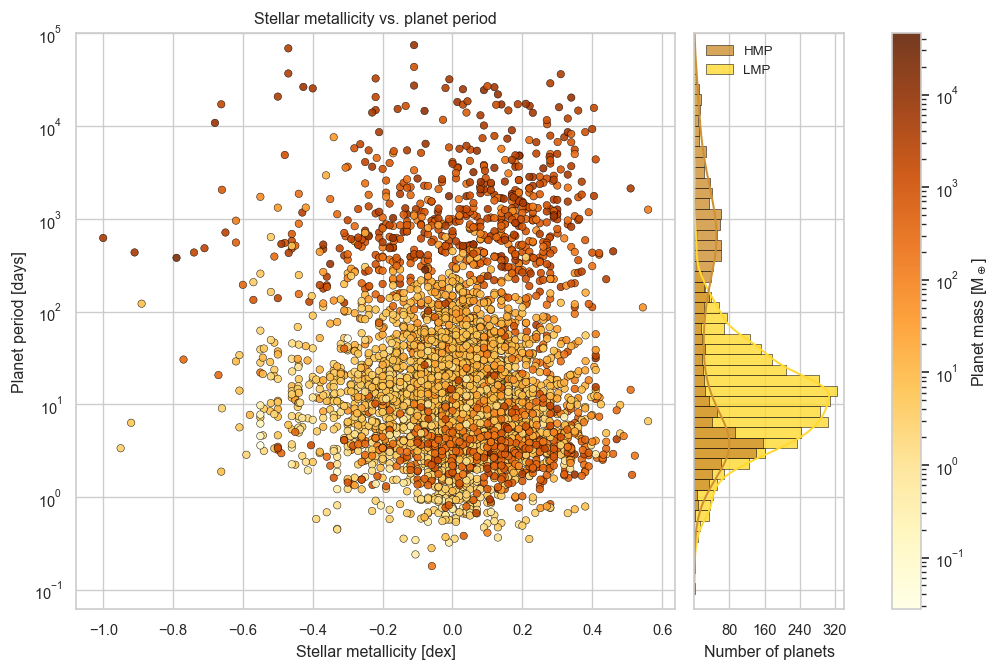

In [15]:
sns.set_context('paper')

# Start with a square Figure.
fig = plt.figure(figsize=(10, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(1, 2,  width_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[0, 1], sharey=ax)

ax_histy.tick_params(axis="y", labelleft=False)

plt.sca(ax)

plt.scatter(data=data, x="st_met", y="pl_orbper",
            cmap='YlOrBr',
            c='pl_bmasse', edgecolors='k', linewidths=0.3, s=20,
            norm=colors.LogNorm(), alpha=0.9)

ax.set(yscale="log")
ax.set_ylim(top=1e5)

plt.colorbar(ax=[ax, ax_histy])

# change name of colorbar to 'Planet mass [M$_J$]'
cbar = ax.collections[0].colorbar
cbar.set_label('Planet mass [M$_\oplus$]')

yellowish = sns.color_palette("Set2")[5]
brownish = sns.color_palette("husl", 8)[1]

plt.sca(ax_histy)
hist = sns.histplot(data=data, y="pl_orbper", ax=ax_histy, kde=True, alpha=0.8, hue='pl_mass_bin', palette=(brownish, yellowish), edgecolor='k', linewidth=0.3)

# modify the legend using plt
handles = ax_histy.get_legend().legendHandles
legend = plt.legend(handles, ['HMP', 'LMP'], fontsize='small', frameon=False, loc='upper left')

ax.set_xlabel('Stellar metallicity [dex]')
ax.set_ylabel('Planet period [days]')
ax.set_title('Stellar metallicity vs. planet period')

ax_histy.set_xlabel('Number of planets')
ax_histy.set_xticks([80, 160, 240, 320])

plt.show()
